<a href="https://colab.research.google.com/github/AngelTroncoso/Growpbi_ML/blob/main/Mi_Primer_Modelo_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Etapas de un problema de Machine Learning**

* **Definir el problema:** Que se pretende predecir? o Que datos es necesario conseguir?
* **Explorar y entender** los datos para crear el modelo
* **Metrica de exito:** Definir una apropiada de cuantificar como de buenos son los resultados.
* **Preparar la estrategia para evaluar el modelo:** Separar las observaciones (filas) en conjunto de datos de entrenamiento, un conjunto de validacion (validacion cruzada) y un conjunto de test. Es muy importe asegurar que ninguna informacion del conjunto de test participa en el proceso de entrenamiento.
* **Preprocesamiento de Datos:** Aplicar las transformaciones necesarias para que los datos puedan ser interpretados por el algoritmo de machine learning seleccionado.
* **Ajustar un primer modelo capaz de superar unos resultados minimos:** Por ejemplo, en los problemas clasificacion, el minimo es superar el % de la clase mayoritaria (la moda). En los de regresion, la media de la variable respuesta.
* Gradualmente, mejorar el modelo incorporando-creando nuevas variables u optimizando los hiperparametros.
* **Evaluar la capacidad del modelo final** con el conjunto de test para tener una estimacion de la capacidad que tiene el modelo cuando predice nuevas observaciones
* **Entrenar el modelo final** con todos los datos disponibles.

In [ ]:
!pip uninstall -y fitter numpy pandas scipy matplotlib seaborn scikit-learn
!pip install --upgrade numpy pandas scipy matplotlib seaborn scikit-learn
!pip install fitter
!pip install matplotlib-venn
import os; os.kill(os.getpid(), 9)  # Reinicia Colab automáticamente

Found existing installation: fitter 1.7.1
Uninstalling fitter-1.7.1:
  Successfully uninstalled fitter-1.7.1
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy-1.15.2
Found existing installation: matplotlib 3.10.1
Uninstalling matplotlib-3.10.1:
  Successfully uninstalled matplotlib-3.10.1
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata

In [7]:
# Tratamiento de datos
import numpy as np
import pandas as pd

#Visual
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import matplotlib.ticker as ticker

#Preprocesamiento de Datos y Modelado
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Otras
from fitter import Fitter, get_common_distributions


In [6]:
#configurar matplotlib
plt.rcParams["image.cmap"] = "bwr"
plt.rcParams["figure.dpi"] = "100"
plt.rcParams["savefig.bbox"] = "tight"
style.use("ggplot") or plt.style.use("ggplot")

#Configuracion de entorno de Errores o advertencias
import warnings
warnings.filterwarnings("ignore")

In [8]:
path = "/content/Dataset_Energia_Electrica.csv"

datos = pd.read_csv(path, encoding="latin-1")
datos.head()

,Area_del_Edificio,Ano_de_Construccion,Tipo_de_Aislamiento,Numero_de_Ventanas,Sistema_Calefaccion,Sistema_Refrigeracion,Uso_del_Edificio,Ubicacion_Geografica,Medidas_Eficiencia_Energetica,Consumo_Energetico_Anual
0,296.966077,1928,Básico,15,Moderado,Avanzado,Industrial,Minnesota,1,478.700084
1,371.835215,2004,Superior,17,Avanzado,Básico,Residencial,Utah,4,297.845980
2,321.243519,1959,Básico,16,Básico,Avanzado,Residencial,Maryland,3,332.399639
3,295.197432,1992,Avanzado,1,Básico,Avanzado,Comercial,Pennsylvania,9,111.162625
4,240.644660,1965,Básico,1,Avanzado,Avanzado,Industrial,Vermont,9,325.902110


# Analisis Exploratorio de los Datos

Antes de entrenar un modelo predictivo, o inclusive antes de realizar cualquier calculo con un nuevo conjunto de datos, es **muy importante** realizar una exploracion descriptiva de los mismos. Este proceso nos permite entender mejor que informacion contiene cada variable, asi como detectar posibles errores. Algunos frecuentes son:

* Que una columna se haya almacenado con el tipo de datos incorrecto: una variable numerica esta siendo reconocida como texto o viceversa.
* Que una variable contenga valores que no tienen sentido: por ejemplo, para que indicar en este caso que una vivienda tiene un valor de 0 o un espacio vacio.
*Que por error en una variable se haya introducido un texto.

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area_del_Edificio              10000 non-null  float64
 1   Ano_de_Construccion            10000 non-null  int64  
 2   Tipo_de_Aislamiento            10000 non-null  object 
 3   Numero_de_Ventanas             10000 non-null  int64  
 4   Sistema_Calefaccion            10000 non-null  object 
 5   Sistema_Refrigeracion          10000 non-null  object 
 6   Uso_del_Edificio               10000 non-null  object 
 7   Ubicacion_Geografica           10000 non-null  object 
 8   Medidas_Eficiencia_Energetica  10000 non-null  int64  
 9   Consumo_Energetico_Anual       10000 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


In [10]:
# cantidad de observaciones
datos.shape

(10000, 10)

In [13]:
# estadistica descriptiva de las variables numericas
datos.select_dtypes(include= ["float", "int"]).describe()

,Area_del_Edificio,Ano_de_Construccion,Numero_de_Ventanas,Medidas_Eficiencia_Energetica,Consumo_Energetico_Anual
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,273.406501,1961.690900,9.49310,5.458700,245.670129
std,130.322513,35.448634,5.73671,2.873207,100.222264
min,50.032602,1900.000000,0.00000,1.000000,-146.965665
25%,160.389523,1931.000000,5.00000,3.000000,176.021396
50%,272.075464,1962.000000,9.00000,5.000000,245.636441
75%,386.731798,1993.000000,14.00000,8.000000,314.955119
max,499.990078,2022.000000,19.00000,10.000000,596.204082


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gennorm,0.000001,1593.155590,1614.786612,inf,0.004278,0.992745
johnsonsb,0.000001,1601.466474,1630.307835,inf,0.004156,0.994980
rdist,0.000001,1599.761554,1621.392575,inf,0.004233,0.993632
beta,0.000001,1601.392397,1630.233759,inf,0.004200,0.994247
gausshyper,0.000002,1603.379199,1646.641241,inf,0.007281,0.661293
nakagami,0.000002,1574.672816,1596.303838,inf,0.007697,0.591336
powernorm,0.000002,1575.323300,1596.954321,inf,0.007864,0.563728
vonmises_line,0.000002,1573.081730,1594.712751,inf,0.007561,0.614061
erlang,0.000002,1573.868996,1595.500017,inf,0.007443,0.633916
tukeylambda,0.000208,1328.395834,1350.026856,inf,0.266083,0.000000


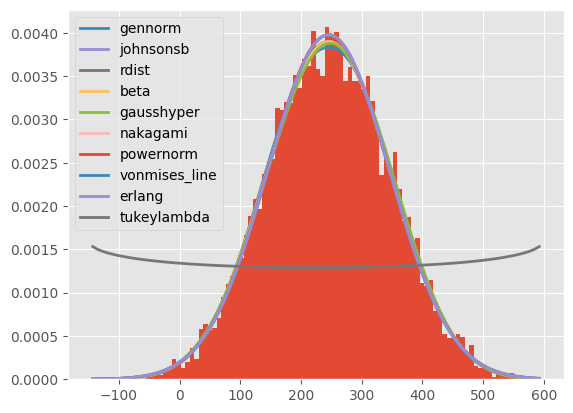

In [20]:
distribuciones = ["gennorm","johnsonsb", "rdist", "beta", "tukeylambda", "gausshyper", "nakagami", "powernorm", "vonmises_line", "erlang"]

#crear una instancia de fitter para la columna deseada
fitter = Fitter(datos.Consumo_Energetico_Anual,distributions= distribuciones)

#ajustar todas las distribuciones disponibles
fitter.fit()

#mostrar un resumen de las mejores distribuciones
fitter.summary(Nbest=10, plot=True)

## Correlacion Entre Variables

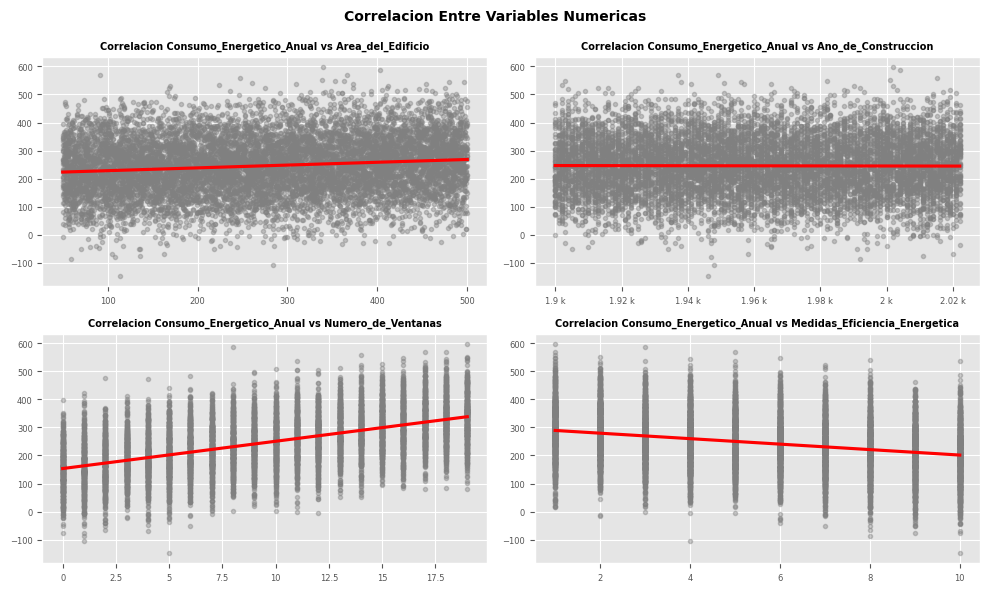

In [25]:
#grafico de correlacion entre variables numericas

fig, axes =plt.subplots(nrows = 2, ncols = 2, figsize = (10,6))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include = ["float", "int"]).columns
columnas_numeric = columnas_numeric.drop("Consumo_Energetico_Anual")

for i, columna in enumerate(columnas_numeric):
  sns.regplot(
      x = datos[columna],
      y = datos["Consumo_Energetico_Anual"],
      color = "gray",
      marker = ".",
      scatter_kws = {"alpha":0.4},
      line_kws = {"color": "red"},
      ax = axes[i]
)
# Formatos de la etiquetas
  axes[i].set_title(f"Correlacion Consumo_Energetico_Anual vs {columna}", fontsize = 7, fontweight = "bold")
  axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
  axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
  axes[i].tick_params(labelsize = 6)
  axes[i].set_xlabel("")
  axes[i].set_ylabel("")
# subtitulos para los graficos
for i in [4]:
  fig.tight_layout()
  plt.subplots_adjust(top = 0.9)
  fig.suptitle("Correlacion Entre Variables Numericas", fontsize = 10, fontweight = "bold")
  plt.show()


In [27]:
def matriz_correlacion(corr_mat):
  """funciona para convertir una matriz de correlacion en formato numerica a tipo tidy o dataframe"""
  corr_mat = corr_mat.stack().reset_index()
  corr_mat.columns = ["variable_1", "variable_2", "corr"]
  corr_mat = corr_mat.loc[corr_mat["variable_1"] != corr_mat["variable_2"], :]
  corr_mat["valor Absoluto"] = np.abs(corr_mat["corr"])
  corr_mat = corr_mat.sort_values("valor Absoluto", ascending = False)
  return (corr_mat)

corr_matriz = datos.select_dtypes(include = ["float", "int"]).corr(method = "pearson")
matriz_correlacion(corr_matriz).head(10)


,variable_1,variable_2,corr,valor Absoluto
14,Numero_de_Ventanas,Consumo_Energetico_Anual,0.556287,0.556287
22,Consumo_Energetico_Anual,Numero_de_Ventanas,0.556287,0.556287
23,Consumo_Energetico_Anual,Medidas_Eficiencia_Energetica,-0.279281,0.279281
19,Medidas_Eficiencia_Energetica,Consumo_Energetico_Anual,-0.279281,0.279281
4,Area_del_Edificio,Consumo_Energetico_Anual,0.129797,0.129797
20,Consumo_Energetico_Anual,Area_del_Edificio,0.129797,0.129797
17,Medidas_Eficiencia_Energetica,Numero_de_Ventanas,0.014345,0.014345
13,Numero_de_Ventanas,Medidas_Eficiencia_Energetica,0.014345,0.014345
11,Numero_de_Ventanas,Ano_de_Construccion,0.013200,0.013200
7,Ano_de_Construccion,Numero_de_Ventanas,0.013200,0.013200


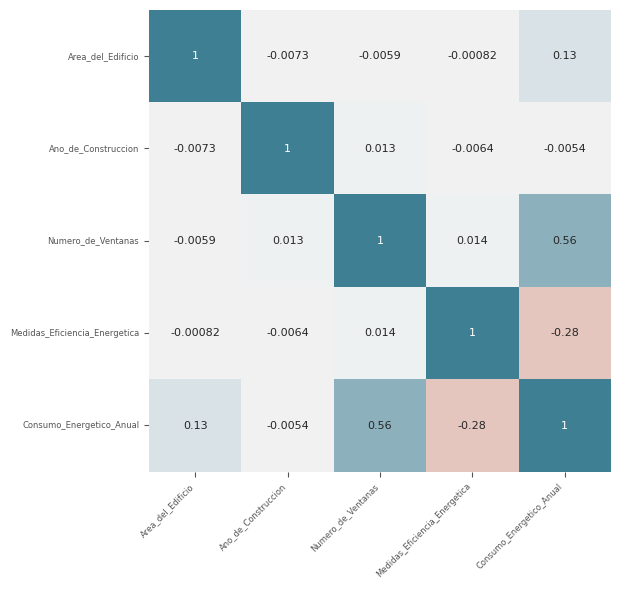

In [31]:
# heatmap de matriz de correlaciones

fig, ax = plt.subplots(figsize = (6,6))

sns.heatmap(
    corr_matriz,
    annot = True,
    cbar = False,
    annot_kws = {"size":8},
    vmin = -1,
    vmax = 1,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True,
    ax = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    ha = "right"
)
ax.tick_params(labelsize = 6)
plt.show()

## Revision Valores Nulos

In [34]:
#revision para valores nulos
datos.isnull().sum()
datos.isna().sum()

,0
Area_del_Edificio,0
Ano_de_Construccion,0
Tipo_de_Aislamiento,0
Numero_de_Ventanas,0
Sistema_Calefaccion,0
Sistema_Refrigeracion,0
Uso_del_Edificio,0
Ubicacion_Geografica,0
Medidas_Eficiencia_Energetica,0
Consumo_Energetico_Anual,0


<Axes: >

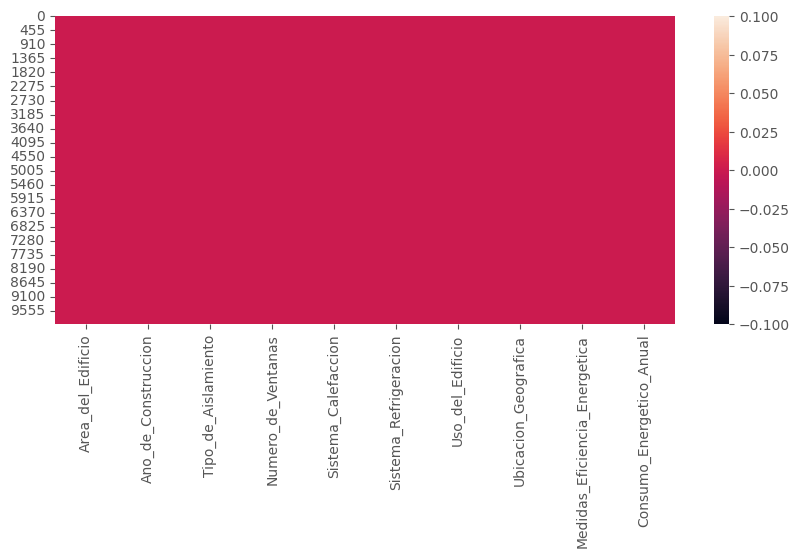

In [35]:
#revisar los datos vacios con un mapa de calor
fig, axes = plt.subplots(figsize = (10,4))

sns.heatmap(datos.isnull())

<Axes: >

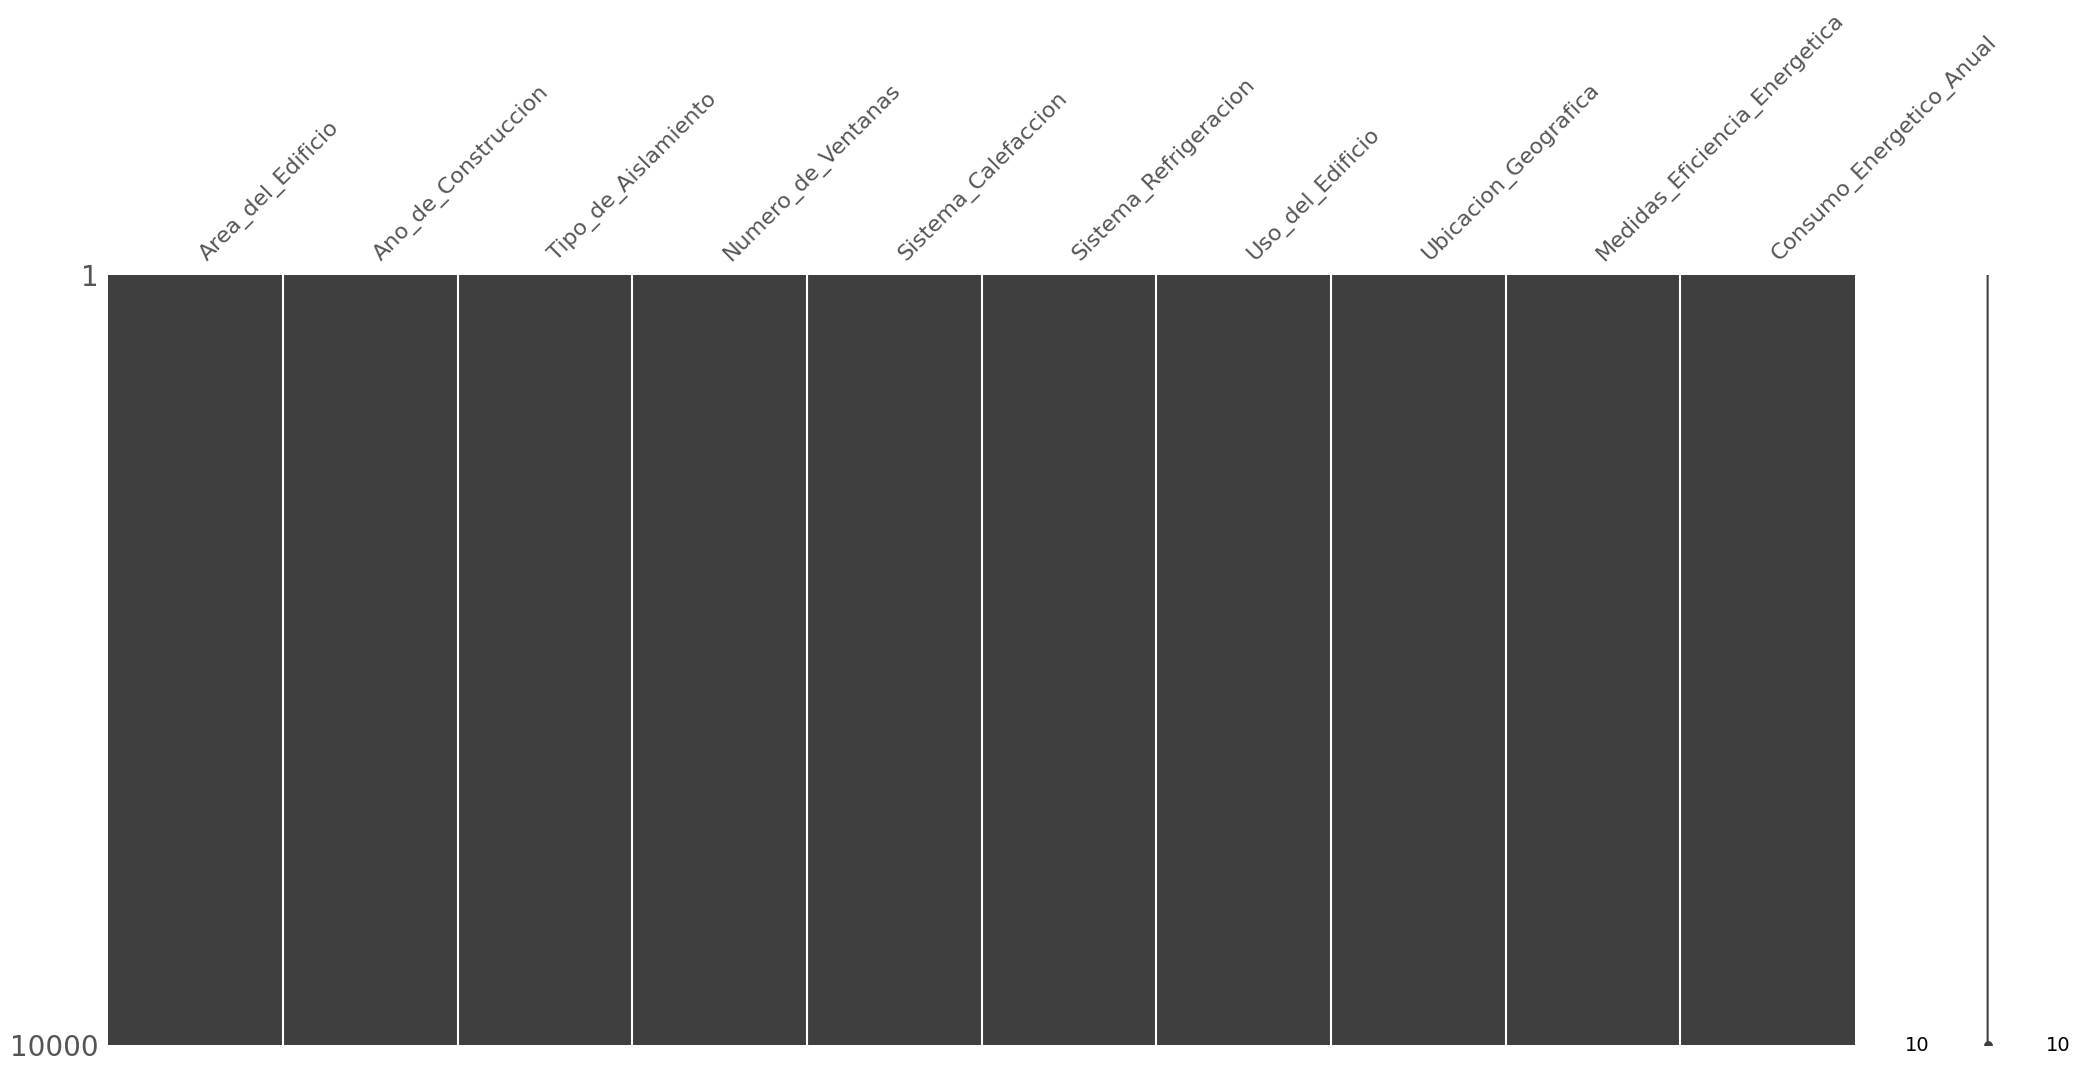

In [36]:
import missingno as msno

msno.matrix(datos)

# Division Train y Test

Evaluar la capacidad predictiva de un modelo, consiste en comprobar como son las proximas predicciones a los verdaderos valores de la variable respuesta.

Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no haya participado en su ajuste. Con esa finalidad se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test.

El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad en la estimacion del error, por lo cual se suele usar 80% y 20% - 70% y 30% que suelen buenos resultado. El reparto debe de hacerse de forma aleatoria o aleatoria estratificada.

## Reingenieria de Caracteristicas

## Seleccion de Caracteristicas Importantes

## Creacion y Entrenamiento del Modelo

## Evaluacion del Modelo

## Probando el Modelo de ML con Datos Nuevos